In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Admission_Predict.csv")

df = df.drop("Serial No.", axis=1)

df = df.sample(frac=1, random_state=42) 
train_size = int(0.6 * len(df)) 
train_df = df[:train_size]
test_df = df[train_size:]

In [20]:
X_train = train_df.drop("Chance of Admit ", axis=1).values 
y_train = train_df["Chance of Admit "].values.reshape(-1, 1) 
X_test = test_df.drop("Chance of Admit ", axis=1).values
y_test = test_df["Chance of Admit "].values.reshape(-1, 1)

In [21]:
X_min = X_train.min(axis=0) 
X_max = X_train.max(axis=0) 
X_train_norm = (X_train - X_min) / (X_max - X_min)
X_test_norm = (X_test - X_min) / (X_max - X_min)
# print(X_train_norm)

In [22]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient(X, y_true, y_pred, w, b):
    N = len(X) 
    dw = -2 / N * np.dot(X.T, (y_true - y_pred)) 
    db = -2 / N * np.sum(y_true - y_pred) 
    return dw, db

def gradient_descent_update(X, y, w, b, alpha):
    y_pred = np.dot(X, w) + b 
    dw, db = gradient(X, y, y_pred, w, b)
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [23]:
def train_linear_regression(X, y, variant="batch", epochs=1000, alpha=0.1):
    n_features = X.shape[1]
    w = np.random.randn(n_features, 1)
    b = np.random.randn()
    losses = []
    if variant == "batch":
        batch_size = len(X)
    elif variant == "mini-batch":
        batch_size = 10 
    elif variant == "stochastic":
        batch_size = 1 
    else:
        print("Invalid variant name. Please choose from 'batch', 'mini-batch', or 'stochastic'.")
        return None, None, None
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            w, b = gradient_descent_update(X_batch, y_batch, w, b, alpha)
            y_pred = np.dot(X_batch, w) + b
            batch_loss = mse(y_batch, y_pred)
            epoch_loss += batch_loss * len(X_batch)
        
        epoch_loss /= len(X)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    
    return w, b, losses

In [24]:
w_batch, b_batch, losses_batch = train_linear_regression(X_train_norm, y_train, variant="batch")
w_mini, b_mini, losses_mini = train_linear_regression(X_train_norm, y_train, variant="mini-batch")
w_sto, b_sto, losses_sto = train_linear_regression(X_train_norm, y_train, variant="stochastic")

Epoch 1, Loss: 0.40150957522881026
Epoch 2, Loss: 0.11590190547708958
Epoch 3, Loss: 0.0804220130454986
Epoch 4, Loss: 0.07452985900604475
Epoch 5, Loss: 0.07220186209813369
Epoch 6, Loss: 0.07036355670060342
Epoch 7, Loss: 0.06864826905839999
Epoch 8, Loss: 0.06700905075113486
Epoch 9, Loss: 0.06543691876282767
Epoch 10, Loss: 0.06392759636901113
Epoch 11, Loss: 0.062477573120314815
Epoch 12, Loss: 0.06108362504045739
Epoch 13, Loss: 0.05974274415200125
Epoch 14, Loss: 0.058452117308741884
Epoch 15, Loss: 0.05720911178463664
Epoch 16, Loss: 0.05601126252962769
Epoch 17, Loss: 0.05485626042744105
Epoch 18, Loss: 0.053741941417271025
Epoch 19, Loss: 0.05266627640785903
Epoch 20, Loss: 0.05162736192444475
Epoch 21, Loss: 0.050623411434285476
Epoch 22, Loss: 0.049652747300576304
Epoch 23, Loss: 0.04871379331835013
Epoch 24, Loss: 0.04780506778939292
Epoch 25, Loss: 0.04692517709640798
Epoch 26, Loss: 0.04607280973962137
Epoch 27, Loss: 0.045246730801758624
Epoch 28, Loss: 0.04444577680985

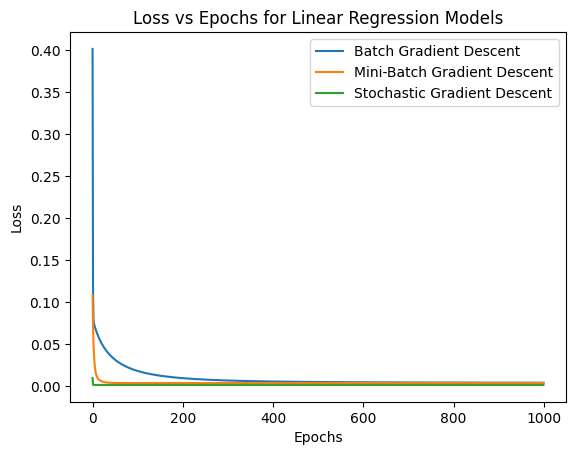

In [25]:
# Plot the loss-vs-iterations for each model
plt.plot(losses_batch, label="Batch Gradient Descent")
plt.plot(losses_mini, label="Mini-Batch Gradient Descent")
plt.plot(losses_sto, label="Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models")
plt.legend()
plt.show()

In [26]:
y_pred_batch = np.dot(X_test_norm, w_batch) + b_batch 
mse_batch = mse(y_test, y_pred_batch) 
print(f"MSE for Batch Gradient Descent: {mse_batch}")

y_pred_mini = np.dot(X_test_norm, w_mini) + b_mini 
mse_mini = mse(y_test, y_pred_mini) 
print(f"MSE for Mini-Batch Gradient Descent: {mse_mini}")

y_pred_sto = np.dot(X_test_norm, w_sto) + b_sto 
mse_sto = mse(y_test, y_pred_sto) 
print(f"MSE for Stochastic Gradient Descent: {mse_sto}")

MSE for Batch Gradient Descent: 0.003915550237893114
MSE for Mini-Batch Gradient Descent: 0.0035543472595162624
MSE for Stochastic Gradient Descent: 0.0051559656981660824


In [35]:
y_pred = y_pred_batch 
y_true = y_test 
correct = (y_pred > 0.5) == (y_true > 0.5) 
results = pd.DataFrame({"Prediction": y_pred.flatten(), "Actual": y_true.flatten(), "Correct": correct.flatten()}) 
print(results)

count = correct.sum()
print(f"The model got it right {count} times out of {len(correct)}")

     Prediction  Actual  Correct
0      0.812735    0.73     True
1      0.591859    0.64     True
2      0.822856    0.84     True
3      0.816000    0.81     True
4      0.655323    0.76     True
..          ...     ...      ...
195    0.848207    0.87     True
196    0.673296    0.72     True
197    0.443876    0.57    False
198    0.569865    0.55     True
199    0.635426    0.62     True

[200 rows x 3 columns]
The model got it right 189 times out of 200


In [28]:
intercept = b_batch 
coefficients = w_batch.flatten() 
features = train_df.drop("Chance of Admit ", axis=1).columns 
equation = f"Chance of Admit = {intercept:.2f}" 
for coefficient, feature in zip(coefficients, features): 
    equation += f" + {coefficient:.2f} * {feature}" 
print(equation)

Chance of Admit = 0.40 + -0.05 * GRE Score + 0.17 * TOEFL Score + 0.02 * University Rating + -0.02 * SOP + 0.06 * LOR  + 0.39 * CGPA + 0.04 * Research


In [29]:
coefficient_feature_pairs = list(zip(coefficients, features)) 
coefficient_feature_pairs.sort(key=lambda x: abs(x[0]), reverse=True) 
ranking = pd.DataFrame(coefficient_feature_pairs, columns=["Coefficient", "Feature"]) 
ranking.index += 1
print(ranking)

   Coefficient            Feature
1     0.387054               CGPA
2     0.171745        TOEFL Score
3     0.063418               LOR 
4    -0.048885          GRE Score
5     0.039227           Research
6    -0.024446                SOP
7     0.023851  University Rating


In [30]:
def logistic_sigmoid(x, s, b):
    return 1 / (1 + np.exp(-s * x + b))

In [31]:
X_train_sigmoid = logistic_sigmoid(X_train_norm, 1, 0)
X_test_sigmoid = logistic_sigmoid(X_test_norm, 1, 0)

In [32]:
w_batch_sigmoid, b_batch_sigmoid, losses_batch_sigmoid = train_linear_regression(X_train_sigmoid, y_train, variant="batch")
w_mini_sigmoid, b_mini_sigmoid, losses_mini_sigmoid = train_linear_regression(X_train_sigmoid, y_train, variant="mini-batch")
w_sto_sigmoid, b_sto_sigmoid, losses_sto_sigmoid = train_linear_regression(X_train_sigmoid, y_train, variant="stochastic")

Epoch 1, Loss: 0.4694313680210659
Epoch 2, Loss: 0.10404649383240837
Epoch 3, Loss: 0.08235015774037265
Epoch 4, Loss: 0.08090409685389136
Epoch 5, Loss: 0.08065168223888333
Epoch 6, Loss: 0.08047011638256313
Epoch 7, Loss: 0.08029324342070228
Epoch 8, Loss: 0.0801171636610742
Epoch 9, Loss: 0.07994164548379201
Epoch 10, Loss: 0.07976667339482624
Epoch 11, Loss: 0.07959224464108357
Epoch 12, Loss: 0.07941835722716321
Epoch 13, Loss: 0.07924500920929024
Epoch 14, Loss: 0.07907219865368752
Epoch 15, Loss: 0.07889992363409604
Epoch 16, Loss: 0.07872818223160173
Epoch 17, Loss: 0.07855697253459852
Epoch 18, Loss: 0.07838629263875908
Epoch 19, Loss: 0.07821614064700676
Epoch 20, Loss: 0.07804651466948707
Epoch 21, Loss: 0.0778774128235397
Epoch 22, Loss: 0.07770883323367042
Epoch 23, Loss: 0.07754077403152318
Epoch 24, Loss: 0.07737323335585244
Epoch 25, Loss: 0.07720620935249511
Epoch 26, Loss: 0.07703970017434336
Epoch 27, Loss: 0.07687370398131689
Epoch 28, Loss: 0.07670821894033562
Epoc

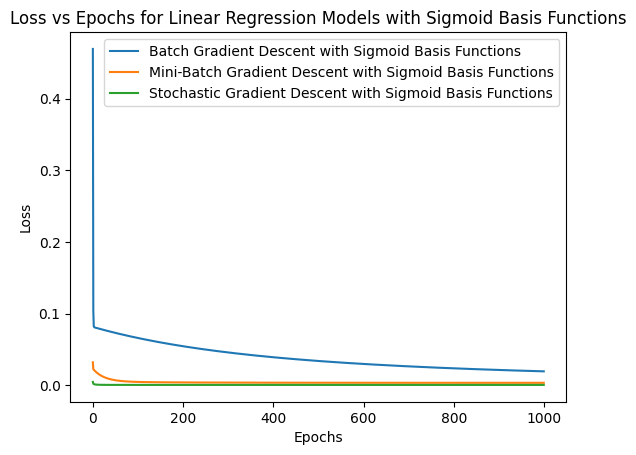

In [33]:
# Plot the loss-vs-iterations for each model with sigmoid basis functions
plt.plot(losses_batch_sigmoid, label="Batch Gradient Descent with Sigmoid Basis Functions")
plt.plot(losses_mini_sigmoid, label="Mini-Batch Gradient Descent with Sigmoid Basis Functions")
plt.plot(losses_sto_sigmoid, label="Stochastic Gradient Descent with Sigmoid Basis Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models with Sigmoid Basis Functions")
plt.legend()
plt.show()

In [34]:
y_pred_batch_sigmoid = np.dot(X_test_sigmoid, w_batch_sigmoid) + b_batch_sigmoid 
mse_batch_sigmoid = mse(y_test, y_pred_batch_sigmoid) 
print(f"MSE for Batch Gradient Descent with Sigmoid Basis Functions: {mse_batch_sigmoid}")

y_pred_mini_sigmoid = np.dot(X_test_sigmoid, w_mini_sigmoid) + b_mini_sigmoid 
mse_mini_sigmoid = mse(y_test, y_pred_mini_sigmoid) 
print(f"MSE for Mini-Batch Gradient Descent with Sigmoid Basis Functions: {mse_mini_sigmoid}")

y_pred_sto_sigmoid = np.dot(X_test_sigmoid, w_sto_sigmoid) + b_sto_sigmoid 
mse_sto_sigmoid = mse(y_test, y_pred_sto_sigmoid)
print(f"MSE for Stochastic Gradient Descent with Sigmoid Basis Functions: {mse_sto_sigmoid}")

MSE for Batch Gradient Descent with Sigmoid Basis Functions: 0.021805645845153904
MSE for Mini-Batch Gradient Descent with Sigmoid Basis Functions: 0.0036243964206128534
MSE for Stochastic Gradient Descent with Sigmoid Basis Functions: 0.004924705973888114
